In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sentiment_analysis import analyze_subreddit
import matplotlib.pyplot as plt
import seaborn as sns

def plot_subreddit_line(subreddit):
    sentiment_dicts = analyze_subreddit(subreddit)
    for comment_dict in sentiment_dicts:
        plt.plot(comment_dict.keys(), [value[0] for value in comment_dict.values()])

def plot_subreddit_bubble(subreddit):
    sentiment_dicts = analyze_subreddit(subreddit)
    for comment_dict in sentiment_dicts:
         sns.scatterplot(x=comment_dict.keys(), y=[value[0] for value in comment_dict.values()], 
                         size=[value[1] for value in comment_dict.values()], alpha = 0.75, legend=False, sizes=(20, 2000))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ali1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


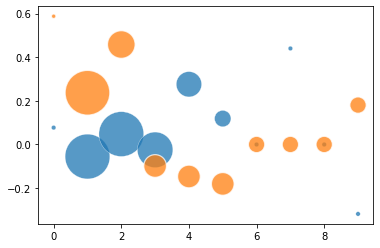

In [10]:
plot_subreddit_bubble('MadeMeSmile')